In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline 

# Formatting setup
# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['axes.grid'] = True

In [5]:
def load_data(file_path):
    """
    TUM format {timestamp, x, y, z, w}
    """
    path = Path(file_path)
    if not path.exists():
        print(f"File not found: {file_path}")
        return None
    
    data = np.loadtxt(path)
    if data.size == 0:
        return None
        
    if data.ndim == 1:
        data = data.reshape(1, -1)
    return data


def plot_trajectories(trajectories, title="Trajectory Comparison", plane='xy',apply_filter=False):
    fig = plt.figure(figsize=(15, 7))
    fig.suptitle(title, fontsize=14)
    
    axis_map = {'x': 0, 'y': 1, 'z': 2}
    idx1, idx2 = axis_map[plane[0].lower()], axis_map[plane[1].lower()]
    ax2d = fig.add_subplot(1, 1, 1)

    # --- FILTERING LOGIC ---
    # 1. First, find the timestamps that exist in the Predicted Pose file
    valid_timestamps = None
    for label, file_path in trajectories.items():
        if "Predicted" in label:
            data = load_data(file_path)
            if data is not None:
                valid_timestamps = data[:, 0] # Get the frame indices/timestamps
                break

    # 2. Plot trajectories
    for label, file_path in trajectories.items():
        data = load_data(file_path)
        
        if data is not None:
            # APPLY FILTER TO GROUND TRUTH
            if apply_filter and "Ground Truth" in label and valid_timestamps is not None:
                # Keep only GT rows where the timestamp exists in Predicted Pose data
                mask = np.isin(data[:, 0], valid_timestamps)
                pos = data[mask, 1:4]
                label = f"{label} (Filtered)"
            else:
                # For Predicted Pose or others, use all available points
                pos = data[:, 1:4]
                label = label
            
            # Plot 2D
            line, = ax2d.plot(pos[:, idx1], pos[:, idx2], label=label, linewidth=1.5, marker='o', markersize=3, alpha=0.7)
            color = line.get_color()
            
            # Start/End markers
            ax2d.scatter(pos[0, idx1], pos[0, idx2], color=color, marker='o', s=100, edgecolors='black', zorder=5)
            ax2d.scatter(pos[-1, idx1], pos[-1, idx2], color=color, marker='x', s=100, lw=3, zorder=5)

    ax2d.legend()
    ax2d.axis('equal')
    ax2d.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

#### run-1-wheelchair-mapping v. run-2-wheelchair-query

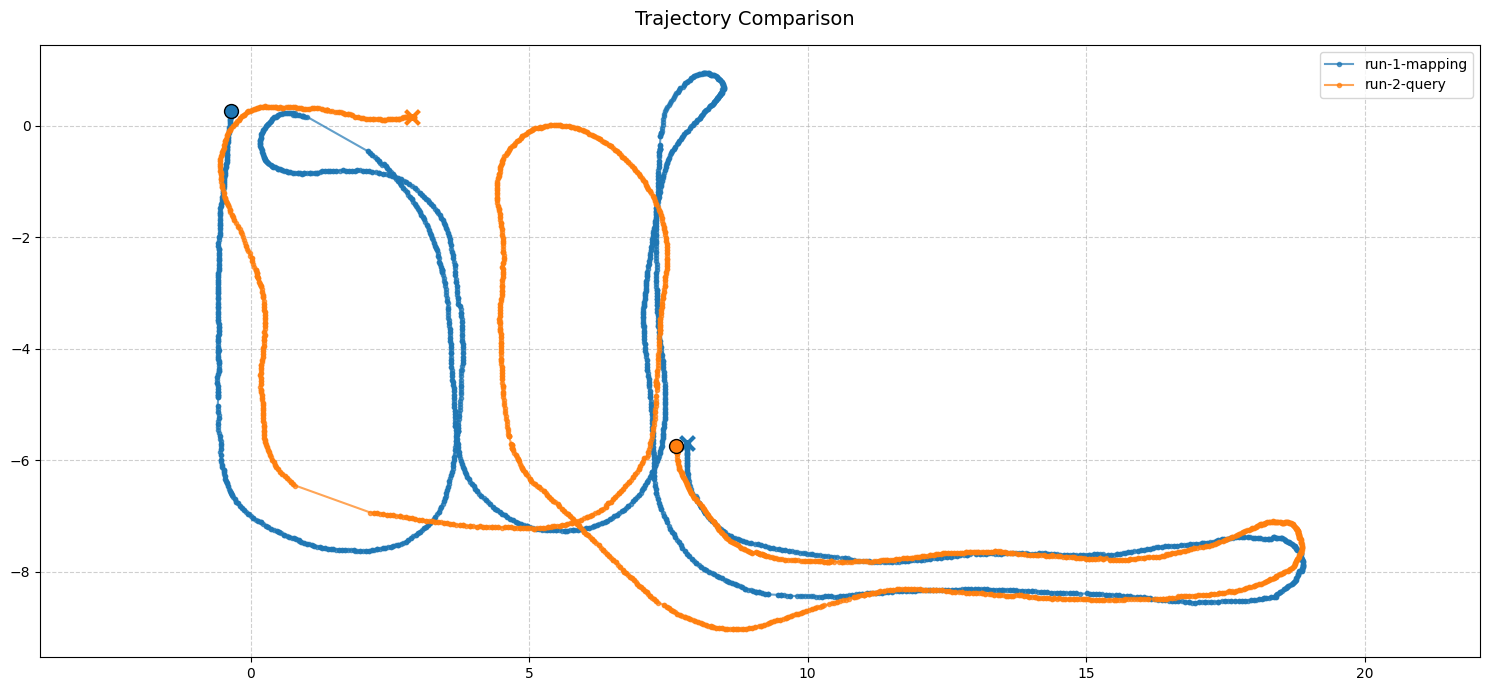

In [6]:
# 1. Define your paths
EXP_NAME = "run-2-oracle-roma"
BASE_PATH = Path("../../../../../../scratch/dynrecon/exps")

# 2. Group the files you want to compare
files_to_plot = {
    "run-1-mapping": "../../../../../../scratch/toponavgroup/indoor-topo-loc/datasets/rrc-lab-data/wheelchair-runs-20241220/run-1-wheelchair-mapping/poses_camera_tum.txt",
    # "Retrieved Frame (Reference)": BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt",
    "run-2-query": "../../../../../../scratch/toponavgroup/indoor-topo-loc/datasets/rrc-lab-data/wheelchair-runs-20241220/run-2-wheelchair-query/poses_camera_tum.txt" 
}

# 3. Call the function
plot_trajectories(
    files_to_plot, 
    plane='xy',
    apply_filter=False
)

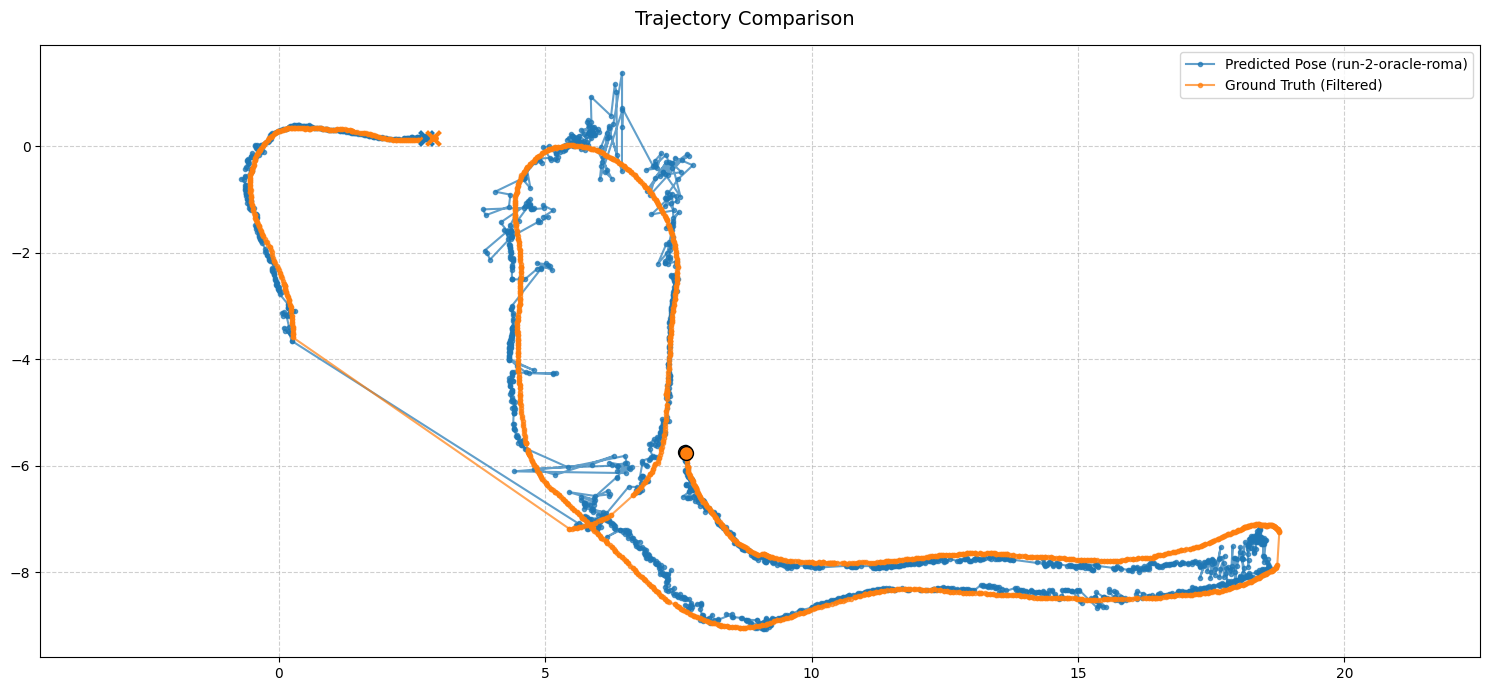

In [8]:
# 1. Define your paths
EXP_NAME = "run-2-oracle-roma"
BASE_PATH = Path("../../../../../../scratch/dynrecon/exps")

# 2. Group the files you want to compare
files_to_plot = {
    f"Predicted Pose ({EXP_NAME})": BASE_PATH / f"pred_trajectory_tum/{EXP_NAME}.txt",
    # "Retrieved Frame (Reference)": BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt",
    "Ground Truth": "../../../../../../scratch/toponavgroup/indoor-topo-loc/datasets/rrc-lab-data/wheelchair-runs-20241220/run-2-wheelchair-query/poses_camera_tum.txt" 
}

# 3. Call the function
plot_trajectories(
    files_to_plot, 
    plane='xy',
    apply_filter=True
)

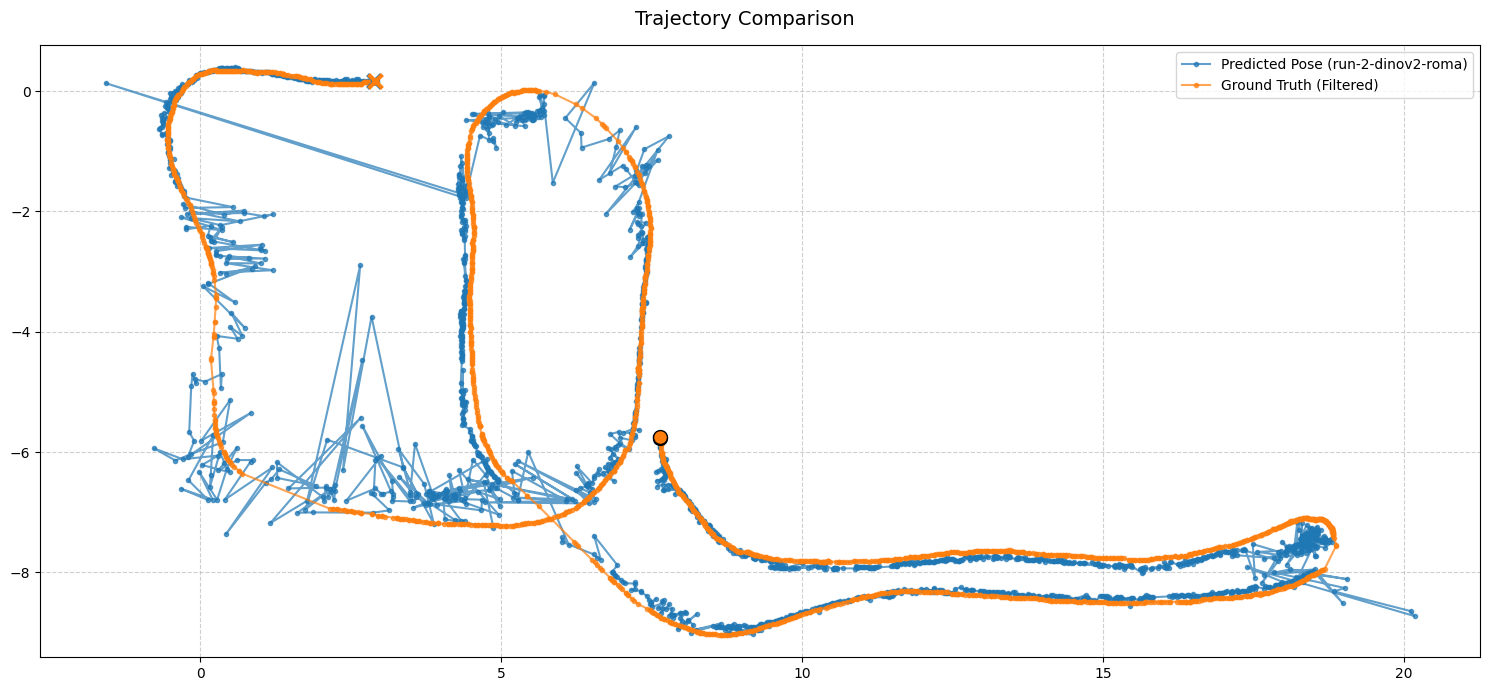

In [9]:
# 1. Define your paths
EXP_NAME = "run-2-dinov2-roma"
BASE_PATH = Path("../../../../../../scratch/dynrecon/exps")

# 2. Group the files you want to compare
files_to_plot = {
    f"Predicted Pose ({EXP_NAME})": BASE_PATH / f"pred_trajectory_tum/{EXP_NAME}.txt",
    # "Retrieved Frame (Reference)": BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt",
    "Ground Truth": "../../../../../../scratch/toponavgroup/indoor-topo-loc/datasets/rrc-lab-data/wheelchair-runs-20241220/run-2-wheelchair-query/poses_camera_tum.txt" 
}

# 3. Call the function
plot_trajectories(
    files_to_plot, 
    plane='xy',
    apply_filter=True
)